<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [57]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv('winequality-red.csv', sep = ";")

1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]
clf = DecisionTreeClassifier()
print('accuracy',  cross_val_score(clf, X, y, cv=10,scoring = 'accuracy').mean())

accuracy 0.45779088050314465


In [4]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=100)
print('accuracy',  cross_val_score(clf, X, y, cv=10,scoring = 'accuracy').mean())

accuracy 0.5559512578616352


In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
print('accuracy',  cross_val_score(clf, X, y, cv=10,scoring = 'accuracy').mean())

accuracy 0.584756289308176


In [ ]:
#RandomForestClassifier показал лучший результат

2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [7]:
from sklearn.ensemble import RandomForestClassifier
tree = [10, 50, 100] + [x for x in range(200, 5001, 200)]

results = {}
for est in tree:
    model = RandomForestClassifier(n_estimators=est, random_state=42, n_jobs=-1).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[est] = accuracy_score(y_test, y_pred)
pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])


,accuracy
10,0.633333
50,0.652083
100,0.654167
200,0.664583
400,0.662500
600,0.664583
800,0.664583
1000,0.664583
1200,0.660417
1400,0.664583


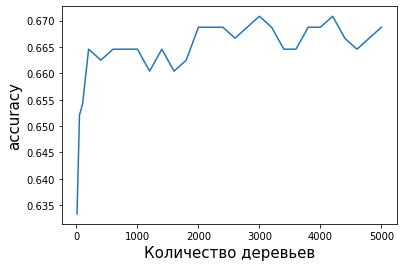

In [8]:
from matplotlib import pyplot as plt
plt.plot(results.keys(),results.values())
plt.xlabel('Количество деревьев', size=15)
plt.ylabel('accuracy', size=15)
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X_train, y_train)
print('accuracy',  cross_val_score(clf, X_test, y_test, cv=10,scoring = 'accuracy').mean())

accuracy 0.5708333333333333


In [63]:
from xgboost import XGBClassifier
clf = XGBClassifier().fit(X_train, y_train)
print('accuracy',  cross_val_score(clf, X_test, y_test, cv=10,scoring = 'accuracy').mean())

[17:48:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [22]:
%%time
parametrs = {'max_depth' : range(1,10), 'n_estimators': range (1, 10), 'learning_rate': np.linspace(0.01,2,10)}
clf = GradientBoostingClassifier()
grid = GridSearchCV(clf, parametrs, scoring='accuracy', n_jobs=-1, cv=3)
fit_model = grid.fit(X_train, y_train)
print("Accuracy:", fit_model.score(X_test, y_test))
grid.best_params_

Accuracy: 0.6083333333333333
Wall time: 2min 15s


{'learning_rate': 0.23111111111111113, 'max_depth': 5, 'n_estimators': 9}

In [71]:
%%time
clf = XGBClassifier()
grid = GridSearchCV(clf, parametrs, scoring='accuracy', n_jobs=-1, cv=3)
fit_model = grid.fit(X_train, y_train)
print("Accuracy:", fit_model.score(X_test, y_test))
grid.best_params_

[17:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.6291666666666667
Wall time: 1min 7s


{'learning_rate': 0.45222222222222225, 'max_depth': 8, 'n_estimators': 9}

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [6]:
from catboost import CatBoostClassifier

In [10]:
clf = CatBoostClassifier().fit(X_train, y_train)
print('accuracy',  cross_val_score(clf, X_test, y_test, cv=10,scoring = 'accuracy').mean())

Learning rate set to 0.079582
0:	learn: 1.6798836	total: 56.9ms	remaining: 56.8s
1:	learn: 1.5987518	total: 66.9ms	remaining: 33.4s
2:	learn: 1.5238132	total: 76.3ms	remaining: 25.4s
3:	learn: 1.4602113	total: 86.6ms	remaining: 21.6s
4:	learn: 1.4046420	total: 97.3ms	remaining: 19.4s
5:	learn: 1.3571609	total: 107ms	remaining: 17.7s
6:	learn: 1.3133440	total: 118ms	remaining: 16.7s
7:	learn: 1.2769983	total: 128ms	remaining: 15.8s
8:	learn: 1.2417352	total: 137ms	remaining: 15.1s
9:	learn: 1.2089482	total: 148ms	remaining: 14.6s
10:	learn: 1.1811884	total: 156ms	remaining: 14.1s
11:	learn: 1.1571506	total: 167ms	remaining: 13.7s
12:	learn: 1.1308868	total: 177ms	remaining: 13.4s
13:	learn: 1.1091579	total: 187ms	remaining: 13.1s
14:	learn: 1.0918378	total: 198ms	remaining: 13s
15:	learn: 1.0750740	total: 208ms	remaining: 12.8s
16:	learn: 1.0591980	total: 218ms	remaining: 12.6s
17:	learn: 1.0431556	total: 228ms	remaining: 12.5s
18:	learn: 1.0284858	total: 238ms	remaining: 12.3s
19:	lear

179:	learn: 0.5474043	total: 1.86s	remaining: 8.5s
180:	learn: 0.5457183	total: 1.88s	remaining: 8.48s
181:	learn: 0.5445416	total: 1.89s	remaining: 8.48s
182:	learn: 0.5431579	total: 1.9s	remaining: 8.47s
183:	learn: 0.5419360	total: 1.91s	remaining: 8.46s
184:	learn: 0.5413067	total: 1.92s	remaining: 8.45s
185:	learn: 0.5401940	total: 1.93s	remaining: 8.43s
186:	learn: 0.5392402	total: 1.94s	remaining: 8.41s
187:	learn: 0.5371584	total: 1.95s	remaining: 8.4s
188:	learn: 0.5355193	total: 1.95s	remaining: 8.39s
189:	learn: 0.5335402	total: 1.96s	remaining: 8.38s
190:	learn: 0.5324119	total: 1.97s	remaining: 8.37s
191:	learn: 0.5310580	total: 1.98s	remaining: 8.35s
192:	learn: 0.5290785	total: 1.99s	remaining: 8.34s
193:	learn: 0.5266963	total: 2s	remaining: 8.32s
194:	learn: 0.5251633	total: 2.01s	remaining: 8.31s
195:	learn: 0.5224840	total: 2.02s	remaining: 8.29s
196:	learn: 0.5209206	total: 2.03s	remaining: 8.28s
197:	learn: 0.5192479	total: 2.04s	remaining: 8.27s
198:	learn: 0.5179

352:	learn: 0.3486255	total: 3.56s	remaining: 6.53s
353:	learn: 0.3480096	total: 3.57s	remaining: 6.51s
354:	learn: 0.3476545	total: 3.58s	remaining: 6.5s
355:	learn: 0.3463939	total: 3.59s	remaining: 6.49s
356:	learn: 0.3458422	total: 3.6s	remaining: 6.48s
357:	learn: 0.3446742	total: 3.61s	remaining: 6.47s
358:	learn: 0.3437149	total: 3.62s	remaining: 6.46s
359:	learn: 0.3428648	total: 3.63s	remaining: 6.45s
360:	learn: 0.3419440	total: 3.64s	remaining: 6.44s
361:	learn: 0.3417555	total: 3.65s	remaining: 6.42s
362:	learn: 0.3406525	total: 3.65s	remaining: 6.41s
363:	learn: 0.3399876	total: 3.66s	remaining: 6.4s
364:	learn: 0.3393745	total: 3.67s	remaining: 6.39s
365:	learn: 0.3388493	total: 3.68s	remaining: 6.38s
366:	learn: 0.3382924	total: 3.69s	remaining: 6.37s
367:	learn: 0.3374413	total: 3.7s	remaining: 6.36s
368:	learn: 0.3363338	total: 3.71s	remaining: 6.35s
369:	learn: 0.3356985	total: 3.72s	remaining: 6.34s
370:	learn: 0.3342350	total: 3.73s	remaining: 6.33s
371:	learn: 0.33

523:	learn: 0.2362207	total: 5.25s	remaining: 4.77s
524:	learn: 0.2357639	total: 5.26s	remaining: 4.76s
525:	learn: 0.2351130	total: 5.27s	remaining: 4.75s
526:	learn: 0.2349221	total: 5.28s	remaining: 4.74s
527:	learn: 0.2340890	total: 5.29s	remaining: 4.73s
528:	learn: 0.2337155	total: 5.3s	remaining: 4.72s
529:	learn: 0.2332469	total: 5.3s	remaining: 4.7s
530:	learn: 0.2326471	total: 5.32s	remaining: 4.69s
531:	learn: 0.2318024	total: 5.33s	remaining: 4.68s
532:	learn: 0.2313361	total: 5.33s	remaining: 4.67s
533:	learn: 0.2307121	total: 5.34s	remaining: 4.66s
534:	learn: 0.2302131	total: 5.35s	remaining: 4.65s
535:	learn: 0.2297930	total: 5.36s	remaining: 4.64s
536:	learn: 0.2296209	total: 5.37s	remaining: 4.63s
537:	learn: 0.2293114	total: 5.38s	remaining: 4.62s
538:	learn: 0.2289996	total: 5.39s	remaining: 4.61s
539:	learn: 0.2285052	total: 5.4s	remaining: 4.6s
540:	learn: 0.2282685	total: 5.41s	remaining: 4.59s
541:	learn: 0.2276077	total: 5.42s	remaining: 4.58s
542:	learn: 0.227

694:	learn: 0.1699459	total: 6.94s	remaining: 3.05s
695:	learn: 0.1698822	total: 6.96s	remaining: 3.04s
696:	learn: 0.1697065	total: 6.97s	remaining: 3.03s
697:	learn: 0.1692561	total: 6.98s	remaining: 3.02s
698:	learn: 0.1689355	total: 6.99s	remaining: 3.01s
699:	learn: 0.1688266	total: 7s	remaining: 3s
700:	learn: 0.1685873	total: 7.01s	remaining: 2.99s
701:	learn: 0.1683534	total: 7.02s	remaining: 2.98s
702:	learn: 0.1679784	total: 7.03s	remaining: 2.97s
703:	learn: 0.1677421	total: 7.04s	remaining: 2.96s
704:	learn: 0.1673561	total: 7.04s	remaining: 2.95s
705:	learn: 0.1671480	total: 7.05s	remaining: 2.94s
706:	learn: 0.1670471	total: 7.06s	remaining: 2.93s
707:	learn: 0.1667071	total: 7.07s	remaining: 2.92s
708:	learn: 0.1666122	total: 7.08s	remaining: 2.91s
709:	learn: 0.1663585	total: 7.09s	remaining: 2.9s
710:	learn: 0.1661717	total: 7.1s	remaining: 2.89s
711:	learn: 0.1659718	total: 7.11s	remaining: 2.88s
712:	learn: 0.1655432	total: 7.12s	remaining: 2.87s
713:	learn: 0.165158

858:	learn: 0.1307347	total: 8.64s	remaining: 1.42s
859:	learn: 0.1305616	total: 8.65s	remaining: 1.41s
860:	learn: 0.1303905	total: 8.66s	remaining: 1.4s
861:	learn: 0.1301943	total: 8.67s	remaining: 1.39s
862:	learn: 0.1300535	total: 8.68s	remaining: 1.38s
863:	learn: 0.1299498	total: 8.69s	remaining: 1.37s
864:	learn: 0.1297008	total: 8.7s	remaining: 1.36s
865:	learn: 0.1295555	total: 8.71s	remaining: 1.35s
866:	learn: 0.1292915	total: 8.72s	remaining: 1.34s
867:	learn: 0.1291747	total: 8.74s	remaining: 1.33s
868:	learn: 0.1289775	total: 8.75s	remaining: 1.32s
869:	learn: 0.1288553	total: 8.76s	remaining: 1.31s
870:	learn: 0.1286664	total: 8.77s	remaining: 1.3s
871:	learn: 0.1285040	total: 8.78s	remaining: 1.29s
872:	learn: 0.1283904	total: 8.79s	remaining: 1.28s
873:	learn: 0.1281607	total: 8.79s	remaining: 1.27s
874:	learn: 0.1280411	total: 8.8s	remaining: 1.26s
875:	learn: 0.1278353	total: 8.81s	remaining: 1.25s
876:	learn: 0.1277229	total: 8.82s	remaining: 1.24s
877:	learn: 0.12

32:	learn: 0.9280547	total: 258ms	remaining: 7.57s
33:	learn: 0.9181368	total: 266ms	remaining: 7.57s
34:	learn: 0.9093376	total: 275ms	remaining: 7.58s
35:	learn: 0.9014296	total: 282ms	remaining: 7.56s
36:	learn: 0.8929648	total: 291ms	remaining: 7.56s
37:	learn: 0.8855305	total: 298ms	remaining: 7.54s
38:	learn: 0.8783558	total: 306ms	remaining: 7.53s
39:	learn: 0.8725915	total: 313ms	remaining: 7.52s
40:	learn: 0.8668866	total: 322ms	remaining: 7.52s
41:	learn: 0.8615012	total: 329ms	remaining: 7.5s
42:	learn: 0.8549845	total: 336ms	remaining: 7.48s
43:	learn: 0.8485970	total: 344ms	remaining: 7.46s
44:	learn: 0.8425792	total: 351ms	remaining: 7.45s
45:	learn: 0.8370893	total: 359ms	remaining: 7.44s
46:	learn: 0.8321276	total: 368ms	remaining: 7.46s
47:	learn: 0.8254289	total: 376ms	remaining: 7.46s
48:	learn: 0.8185954	total: 385ms	remaining: 7.47s
49:	learn: 0.8123837	total: 393ms	remaining: 7.46s
50:	learn: 0.8059049	total: 401ms	remaining: 7.46s
51:	learn: 0.8014587	total: 409m

201:	learn: 0.3847752	total: 1.72s	remaining: 6.79s
202:	learn: 0.3832918	total: 1.73s	remaining: 6.78s
203:	learn: 0.3819405	total: 1.74s	remaining: 6.77s
204:	learn: 0.3804317	total: 1.74s	remaining: 6.76s
205:	learn: 0.3790583	total: 1.75s	remaining: 6.75s
206:	learn: 0.3769559	total: 1.76s	remaining: 6.74s
207:	learn: 0.3750868	total: 1.77s	remaining: 6.73s
208:	learn: 0.3734182	total: 1.77s	remaining: 6.71s
209:	learn: 0.3717923	total: 1.78s	remaining: 6.7s
210:	learn: 0.3704355	total: 1.79s	remaining: 6.69s
211:	learn: 0.3682351	total: 1.8s	remaining: 6.68s
212:	learn: 0.3672336	total: 1.8s	remaining: 6.67s
213:	learn: 0.3655250	total: 1.81s	remaining: 6.66s
214:	learn: 0.3634560	total: 1.82s	remaining: 6.66s
215:	learn: 0.3617074	total: 1.83s	remaining: 6.65s
216:	learn: 0.3599122	total: 1.85s	remaining: 6.66s
217:	learn: 0.3582287	total: 1.86s	remaining: 6.67s
218:	learn: 0.3568215	total: 1.87s	remaining: 6.67s
219:	learn: 0.3551614	total: 1.88s	remaining: 6.66s
220:	learn: 0.3

380:	learn: 0.2038236	total: 3.12s	remaining: 5.07s
381:	learn: 0.2029954	total: 3.13s	remaining: 5.07s
382:	learn: 0.2023120	total: 3.14s	remaining: 5.06s
383:	learn: 0.2016421	total: 3.15s	remaining: 5.05s
384:	learn: 0.2006961	total: 3.16s	remaining: 5.04s
385:	learn: 0.2002776	total: 3.16s	remaining: 5.03s
386:	learn: 0.1995907	total: 3.17s	remaining: 5.02s
387:	learn: 0.1988472	total: 3.18s	remaining: 5.01s
388:	learn: 0.1984535	total: 3.19s	remaining: 5s
389:	learn: 0.1977636	total: 3.19s	remaining: 5s
390:	learn: 0.1970047	total: 3.2s	remaining: 4.99s
391:	learn: 0.1965510	total: 3.21s	remaining: 4.98s
392:	learn: 0.1960906	total: 3.22s	remaining: 4.97s
393:	learn: 0.1956667	total: 3.23s	remaining: 4.96s
394:	learn: 0.1951428	total: 3.23s	remaining: 4.95s
395:	learn: 0.1949559	total: 3.24s	remaining: 4.94s
396:	learn: 0.1944103	total: 3.25s	remaining: 4.93s
397:	learn: 0.1940359	total: 3.26s	remaining: 4.92s
398:	learn: 0.1936140	total: 3.26s	remaining: 4.92s
399:	learn: 0.19311

562:	learn: 0.1252657	total: 4.58s	remaining: 3.55s
563:	learn: 0.1250754	total: 4.58s	remaining: 3.54s
564:	learn: 0.1248697	total: 4.59s	remaining: 3.54s
565:	learn: 0.1246140	total: 4.6s	remaining: 3.53s
566:	learn: 0.1244635	total: 4.61s	remaining: 3.52s
567:	learn: 0.1242529	total: 4.62s	remaining: 3.51s
568:	learn: 0.1236975	total: 4.63s	remaining: 3.5s
569:	learn: 0.1232795	total: 4.63s	remaining: 3.49s
570:	learn: 0.1230958	total: 4.64s	remaining: 3.48s
571:	learn: 0.1228635	total: 4.65s	remaining: 3.48s
572:	learn: 0.1226204	total: 4.65s	remaining: 3.47s
573:	learn: 0.1223647	total: 4.66s	remaining: 3.46s
574:	learn: 0.1220493	total: 4.67s	remaining: 3.45s
575:	learn: 0.1219079	total: 4.68s	remaining: 3.44s
576:	learn: 0.1216023	total: 4.68s	remaining: 3.43s
577:	learn: 0.1213658	total: 4.69s	remaining: 3.42s
578:	learn: 0.1210613	total: 4.7s	remaining: 3.42s
579:	learn: 0.1207940	total: 4.71s	remaining: 3.41s
580:	learn: 0.1203967	total: 4.71s	remaining: 3.4s
581:	learn: 0.12

738:	learn: 0.0880242	total: 6.01s	remaining: 2.12s
739:	learn: 0.0879393	total: 6.02s	remaining: 2.12s
740:	learn: 0.0877646	total: 6.03s	remaining: 2.11s
741:	learn: 0.0875371	total: 6.04s	remaining: 2.1s
742:	learn: 0.0873839	total: 6.05s	remaining: 2.09s
743:	learn: 0.0872243	total: 6.05s	remaining: 2.08s
744:	learn: 0.0870347	total: 6.06s	remaining: 2.07s
745:	learn: 0.0869428	total: 6.07s	remaining: 2.07s
746:	learn: 0.0868442	total: 6.08s	remaining: 2.06s
747:	learn: 0.0867028	total: 6.08s	remaining: 2.05s
748:	learn: 0.0865315	total: 6.09s	remaining: 2.04s
749:	learn: 0.0863976	total: 6.1s	remaining: 2.03s
750:	learn: 0.0862722	total: 6.11s	remaining: 2.02s
751:	learn: 0.0861048	total: 6.12s	remaining: 2.02s
752:	learn: 0.0859857	total: 6.12s	remaining: 2.01s
753:	learn: 0.0858526	total: 6.13s	remaining: 2s
754:	learn: 0.0856779	total: 6.14s	remaining: 1.99s
755:	learn: 0.0854774	total: 6.15s	remaining: 1.98s
756:	learn: 0.0853292	total: 6.16s	remaining: 1.98s
757:	learn: 0.085

903:	learn: 0.0671107	total: 7.31s	remaining: 776ms
904:	learn: 0.0670047	total: 7.32s	remaining: 768ms
905:	learn: 0.0669473	total: 7.32s	remaining: 760ms
906:	learn: 0.0668650	total: 7.33s	remaining: 752ms
907:	learn: 0.0667280	total: 7.34s	remaining: 744ms
908:	learn: 0.0666310	total: 7.35s	remaining: 735ms
909:	learn: 0.0665700	total: 7.35s	remaining: 727ms
910:	learn: 0.0664736	total: 7.36s	remaining: 719ms
911:	learn: 0.0663379	total: 7.37s	remaining: 711ms
912:	learn: 0.0662457	total: 7.38s	remaining: 703ms
913:	learn: 0.0661029	total: 7.38s	remaining: 695ms
914:	learn: 0.0660155	total: 7.39s	remaining: 687ms
915:	learn: 0.0659719	total: 7.4s	remaining: 678ms
916:	learn: 0.0658558	total: 7.4s	remaining: 670ms
917:	learn: 0.0657403	total: 7.41s	remaining: 662ms
918:	learn: 0.0656682	total: 7.42s	remaining: 654ms
919:	learn: 0.0655168	total: 7.43s	remaining: 646ms
920:	learn: 0.0654512	total: 7.43s	remaining: 638ms
921:	learn: 0.0653522	total: 7.44s	remaining: 630ms
922:	learn: 0.

64:	learn: 0.7359314	total: 493ms	remaining: 7.09s
65:	learn: 0.7300959	total: 501ms	remaining: 7.09s
66:	learn: 0.7260865	total: 509ms	remaining: 7.09s
67:	learn: 0.7224276	total: 517ms	remaining: 7.08s
68:	learn: 0.7196725	total: 524ms	remaining: 7.07s
69:	learn: 0.7163246	total: 532ms	remaining: 7.07s
70:	learn: 0.7122979	total: 539ms	remaining: 7.05s
71:	learn: 0.7091493	total: 546ms	remaining: 7.04s
72:	learn: 0.7046849	total: 554ms	remaining: 7.03s
73:	learn: 0.7017561	total: 561ms	remaining: 7.02s
74:	learn: 0.6984826	total: 569ms	remaining: 7.01s
75:	learn: 0.6953553	total: 576ms	remaining: 7s
76:	learn: 0.6930288	total: 583ms	remaining: 6.99s
77:	learn: 0.6885882	total: 590ms	remaining: 6.98s
78:	learn: 0.6844338	total: 598ms	remaining: 6.97s
79:	learn: 0.6816406	total: 605ms	remaining: 6.96s
80:	learn: 0.6796308	total: 613ms	remaining: 6.95s
81:	learn: 0.6762233	total: 620ms	remaining: 6.94s
82:	learn: 0.6723904	total: 628ms	remaining: 6.94s
83:	learn: 0.6698654	total: 635ms	

229:	learn: 0.3458692	total: 1.78s	remaining: 5.95s
230:	learn: 0.3437838	total: 1.78s	remaining: 5.94s
231:	learn: 0.3429358	total: 1.79s	remaining: 5.94s
232:	learn: 0.3418862	total: 1.8s	remaining: 5.93s
233:	learn: 0.3404123	total: 1.81s	remaining: 5.92s
234:	learn: 0.3393197	total: 1.82s	remaining: 5.91s
235:	learn: 0.3385362	total: 1.82s	remaining: 5.91s
236:	learn: 0.3364456	total: 1.83s	remaining: 5.9s
237:	learn: 0.3349858	total: 1.84s	remaining: 5.89s
238:	learn: 0.3337737	total: 1.85s	remaining: 5.88s
239:	learn: 0.3326572	total: 1.85s	remaining: 5.87s
240:	learn: 0.3307702	total: 1.86s	remaining: 5.87s
241:	learn: 0.3290608	total: 1.87s	remaining: 5.86s
242:	learn: 0.3273789	total: 1.88s	remaining: 5.85s
243:	learn: 0.3254917	total: 1.89s	remaining: 5.84s
244:	learn: 0.3237039	total: 1.89s	remaining: 5.83s
245:	learn: 0.3227034	total: 1.9s	remaining: 5.82s
246:	learn: 0.3212487	total: 1.91s	remaining: 5.82s
247:	learn: 0.3198034	total: 1.92s	remaining: 5.81s
248:	learn: 0.3

399:	learn: 0.1911985	total: 3.07s	remaining: 4.61s
400:	learn: 0.1906998	total: 3.08s	remaining: 4.6s
401:	learn: 0.1900145	total: 3.09s	remaining: 4.6s
402:	learn: 0.1893836	total: 3.1s	remaining: 4.59s
403:	learn: 0.1885908	total: 3.1s	remaining: 4.58s
404:	learn: 0.1880137	total: 3.11s	remaining: 4.57s
405:	learn: 0.1873553	total: 3.12s	remaining: 4.56s
406:	learn: 0.1864557	total: 3.13s	remaining: 4.56s
407:	learn: 0.1858682	total: 3.13s	remaining: 4.55s
408:	learn: 0.1852607	total: 3.14s	remaining: 4.54s
409:	learn: 0.1849332	total: 3.15s	remaining: 4.53s
410:	learn: 0.1844646	total: 3.16s	remaining: 4.52s
411:	learn: 0.1838437	total: 3.16s	remaining: 4.51s
412:	learn: 0.1833122	total: 3.17s	remaining: 4.51s
413:	learn: 0.1826690	total: 3.18s	remaining: 4.5s
414:	learn: 0.1822909	total: 3.19s	remaining: 4.49s
415:	learn: 0.1818935	total: 3.19s	remaining: 4.48s
416:	learn: 0.1812708	total: 3.2s	remaining: 4.47s
417:	learn: 0.1808781	total: 3.21s	remaining: 4.47s
418:	learn: 0.1801

562:	learn: 0.1262157	total: 4.35s	remaining: 3.38s
563:	learn: 0.1259652	total: 4.36s	remaining: 3.37s
564:	learn: 0.1257621	total: 4.37s	remaining: 3.36s
565:	learn: 0.1254316	total: 4.37s	remaining: 3.35s
566:	learn: 0.1253236	total: 4.38s	remaining: 3.35s
567:	learn: 0.1250805	total: 4.39s	remaining: 3.34s
568:	learn: 0.1247372	total: 4.39s	remaining: 3.33s
569:	learn: 0.1244301	total: 4.4s	remaining: 3.32s
570:	learn: 0.1242347	total: 4.41s	remaining: 3.31s
571:	learn: 0.1239932	total: 4.42s	remaining: 3.31s
572:	learn: 0.1236746	total: 4.43s	remaining: 3.3s
573:	learn: 0.1234003	total: 4.43s	remaining: 3.29s
574:	learn: 0.1230754	total: 4.44s	remaining: 3.28s
575:	learn: 0.1228314	total: 4.45s	remaining: 3.27s
576:	learn: 0.1224544	total: 4.46s	remaining: 3.27s
577:	learn: 0.1221678	total: 4.46s	remaining: 3.26s
578:	learn: 0.1217438	total: 4.47s	remaining: 3.25s
579:	learn: 0.1214539	total: 4.48s	remaining: 3.24s
580:	learn: 0.1211550	total: 4.49s	remaining: 3.23s
581:	learn: 0.

722:	learn: 0.0898952	total: 5.66s	remaining: 2.17s
723:	learn: 0.0897710	total: 5.67s	remaining: 2.16s
724:	learn: 0.0896705	total: 5.67s	remaining: 2.15s
725:	learn: 0.0894408	total: 5.68s	remaining: 2.15s
726:	learn: 0.0893257	total: 5.69s	remaining: 2.14s
727:	learn: 0.0891295	total: 5.7s	remaining: 2.13s
728:	learn: 0.0889918	total: 5.71s	remaining: 2.12s
729:	learn: 0.0887932	total: 5.72s	remaining: 2.11s
730:	learn: 0.0886200	total: 5.72s	remaining: 2.11s
731:	learn: 0.0884072	total: 5.73s	remaining: 2.1s
732:	learn: 0.0882592	total: 5.74s	remaining: 2.09s
733:	learn: 0.0880432	total: 5.75s	remaining: 2.08s
734:	learn: 0.0878242	total: 5.76s	remaining: 2.08s
735:	learn: 0.0877456	total: 5.76s	remaining: 2.07s
736:	learn: 0.0875119	total: 5.77s	remaining: 2.06s
737:	learn: 0.0873562	total: 5.78s	remaining: 2.05s
738:	learn: 0.0871928	total: 5.79s	remaining: 2.04s
739:	learn: 0.0870312	total: 5.79s	remaining: 2.04s
740:	learn: 0.0869131	total: 5.8s	remaining: 2.03s
741:	learn: 0.0

884:	learn: 0.0680736	total: 6.94s	remaining: 902ms
885:	learn: 0.0680131	total: 6.95s	remaining: 894ms
886:	learn: 0.0679208	total: 6.96s	remaining: 886ms
887:	learn: 0.0678507	total: 6.96s	remaining: 878ms
888:	learn: 0.0677364	total: 6.97s	remaining: 871ms
889:	learn: 0.0676517	total: 6.98s	remaining: 863ms
890:	learn: 0.0675503	total: 6.99s	remaining: 855ms
891:	learn: 0.0674602	total: 6.99s	remaining: 847ms
892:	learn: 0.0673531	total: 7s	remaining: 839ms
893:	learn: 0.0672681	total: 7.01s	remaining: 831ms
894:	learn: 0.0671813	total: 7.02s	remaining: 823ms
895:	learn: 0.0671344	total: 7.03s	remaining: 816ms
896:	learn: 0.0670397	total: 7.03s	remaining: 808ms
897:	learn: 0.0669430	total: 7.04s	remaining: 800ms
898:	learn: 0.0668405	total: 7.05s	remaining: 792ms
899:	learn: 0.0667351	total: 7.05s	remaining: 784ms
900:	learn: 0.0666378	total: 7.06s	remaining: 776ms
901:	learn: 0.0665791	total: 7.08s	remaining: 769ms
902:	learn: 0.0664443	total: 7.09s	remaining: 762ms
903:	learn: 0.0

51:	learn: 0.8009004	total: 431ms	remaining: 7.85s
52:	learn: 0.7957784	total: 439ms	remaining: 7.84s
53:	learn: 0.7907102	total: 447ms	remaining: 7.82s
54:	learn: 0.7853991	total: 454ms	remaining: 7.8s
55:	learn: 0.7811422	total: 462ms	remaining: 7.79s
56:	learn: 0.7748311	total: 469ms	remaining: 7.76s
57:	learn: 0.7701914	total: 477ms	remaining: 7.74s
58:	learn: 0.7648576	total: 484ms	remaining: 7.72s
59:	learn: 0.7603996	total: 491ms	remaining: 7.7s
60:	learn: 0.7555055	total: 499ms	remaining: 7.68s
61:	learn: 0.7507985	total: 506ms	remaining: 7.66s
62:	learn: 0.7478509	total: 513ms	remaining: 7.63s
63:	learn: 0.7439618	total: 521ms	remaining: 7.62s
64:	learn: 0.7398930	total: 529ms	remaining: 7.61s
65:	learn: 0.7340622	total: 536ms	remaining: 7.59s
66:	learn: 0.7301359	total: 544ms	remaining: 7.58s
67:	learn: 0.7255597	total: 551ms	remaining: 7.55s
68:	learn: 0.7218381	total: 558ms	remaining: 7.54s
69:	learn: 0.7168143	total: 566ms	remaining: 7.52s
70:	learn: 0.7126995	total: 574ms

213:	learn: 0.3637431	total: 1.71s	remaining: 6.28s
214:	learn: 0.3620759	total: 1.72s	remaining: 6.27s
215:	learn: 0.3604708	total: 1.73s	remaining: 6.27s
216:	learn: 0.3593781	total: 1.74s	remaining: 6.26s
217:	learn: 0.3578278	total: 1.74s	remaining: 6.25s
218:	learn: 0.3569656	total: 1.75s	remaining: 6.25s
219:	learn: 0.3550179	total: 1.76s	remaining: 6.24s
220:	learn: 0.3535674	total: 1.77s	remaining: 6.23s
221:	learn: 0.3518668	total: 1.77s	remaining: 6.22s
222:	learn: 0.3505391	total: 1.78s	remaining: 6.21s
223:	learn: 0.3487881	total: 1.79s	remaining: 6.2s
224:	learn: 0.3470435	total: 1.8s	remaining: 6.19s
225:	learn: 0.3455907	total: 1.8s	remaining: 6.18s
226:	learn: 0.3445184	total: 1.81s	remaining: 6.17s
227:	learn: 0.3425112	total: 1.82s	remaining: 6.16s
228:	learn: 0.3401130	total: 1.83s	remaining: 6.16s
229:	learn: 0.3387691	total: 1.84s	remaining: 6.15s
230:	learn: 0.3373876	total: 1.84s	remaining: 6.14s
231:	learn: 0.3364880	total: 1.85s	remaining: 6.13s
232:	learn: 0.3

385:	learn: 0.1980672	total: 3.21s	remaining: 5.11s
386:	learn: 0.1975222	total: 3.22s	remaining: 5.11s
387:	learn: 0.1969712	total: 3.23s	remaining: 5.1s
388:	learn: 0.1963691	total: 3.24s	remaining: 5.09s
389:	learn: 0.1955182	total: 3.25s	remaining: 5.08s
390:	learn: 0.1950690	total: 3.25s	remaining: 5.07s
391:	learn: 0.1941461	total: 3.26s	remaining: 5.06s
392:	learn: 0.1936369	total: 3.27s	remaining: 5.05s
393:	learn: 0.1931237	total: 3.28s	remaining: 5.04s
394:	learn: 0.1926196	total: 3.29s	remaining: 5.03s
395:	learn: 0.1921510	total: 3.29s	remaining: 5.02s
396:	learn: 0.1916367	total: 3.3s	remaining: 5.01s
397:	learn: 0.1909138	total: 3.31s	remaining: 5s
398:	learn: 0.1906427	total: 3.32s	remaining: 4.99s
399:	learn: 0.1900120	total: 3.32s	remaining: 4.99s
400:	learn: 0.1896174	total: 3.33s	remaining: 4.97s
401:	learn: 0.1886015	total: 3.34s	remaining: 4.97s
402:	learn: 0.1878336	total: 3.35s	remaining: 4.96s
403:	learn: 0.1869717	total: 3.35s	remaining: 4.95s
404:	learn: 0.186

551:	learn: 0.1261375	total: 4.51s	remaining: 3.66s
552:	learn: 0.1258314	total: 4.51s	remaining: 3.65s
553:	learn: 0.1256175	total: 4.52s	remaining: 3.64s
554:	learn: 0.1254146	total: 4.53s	remaining: 3.63s
555:	learn: 0.1251049	total: 4.54s	remaining: 3.62s
556:	learn: 0.1249498	total: 4.55s	remaining: 3.62s
557:	learn: 0.1247538	total: 4.55s	remaining: 3.61s
558:	learn: 0.1243695	total: 4.56s	remaining: 3.6s
559:	learn: 0.1240639	total: 4.57s	remaining: 3.59s
560:	learn: 0.1239572	total: 4.58s	remaining: 3.58s
561:	learn: 0.1235734	total: 4.58s	remaining: 3.57s
562:	learn: 0.1232802	total: 4.59s	remaining: 3.56s
563:	learn: 0.1229487	total: 4.6s	remaining: 3.56s
564:	learn: 0.1225829	total: 4.61s	remaining: 3.55s
565:	learn: 0.1224056	total: 4.61s	remaining: 3.54s
566:	learn: 0.1222230	total: 4.62s	remaining: 3.53s
567:	learn: 0.1220384	total: 4.63s	remaining: 3.52s
568:	learn: 0.1216949	total: 4.63s	remaining: 3.51s
569:	learn: 0.1214889	total: 4.64s	remaining: 3.5s
570:	learn: 0.1

710:	learn: 0.0903887	total: 5.77s	remaining: 2.34s
711:	learn: 0.0902364	total: 5.78s	remaining: 2.34s
712:	learn: 0.0901098	total: 5.78s	remaining: 2.33s
713:	learn: 0.0900350	total: 5.79s	remaining: 2.32s
714:	learn: 0.0898972	total: 5.8s	remaining: 2.31s
715:	learn: 0.0897427	total: 5.81s	remaining: 2.3s
716:	learn: 0.0895932	total: 5.81s	remaining: 2.29s
717:	learn: 0.0893932	total: 5.82s	remaining: 2.29s
718:	learn: 0.0892390	total: 5.83s	remaining: 2.28s
719:	learn: 0.0890978	total: 5.84s	remaining: 2.27s
720:	learn: 0.0889107	total: 5.84s	remaining: 2.26s
721:	learn: 0.0888145	total: 5.85s	remaining: 2.25s
722:	learn: 0.0885786	total: 5.86s	remaining: 2.24s
723:	learn: 0.0883928	total: 5.87s	remaining: 2.24s
724:	learn: 0.0882368	total: 5.88s	remaining: 2.23s
725:	learn: 0.0880885	total: 5.88s	remaining: 2.22s
726:	learn: 0.0879562	total: 5.89s	remaining: 2.21s
727:	learn: 0.0878276	total: 5.9s	remaining: 2.2s
728:	learn: 0.0876087	total: 5.91s	remaining: 2.19s
729:	learn: 0.08

876:	learn: 0.0678171	total: 7.05s	remaining: 989ms
877:	learn: 0.0677272	total: 7.06s	remaining: 981ms
878:	learn: 0.0675675	total: 7.07s	remaining: 973ms
879:	learn: 0.0674330	total: 7.08s	remaining: 965ms
880:	learn: 0.0673447	total: 7.09s	remaining: 957ms
881:	learn: 0.0672430	total: 7.09s	remaining: 949ms
882:	learn: 0.0671589	total: 7.1s	remaining: 941ms
883:	learn: 0.0670122	total: 7.11s	remaining: 933ms
884:	learn: 0.0668995	total: 7.12s	remaining: 925ms
885:	learn: 0.0667593	total: 7.12s	remaining: 917ms
886:	learn: 0.0666753	total: 7.13s	remaining: 909ms
887:	learn: 0.0665802	total: 7.14s	remaining: 900ms
888:	learn: 0.0664648	total: 7.15s	remaining: 892ms
889:	learn: 0.0663403	total: 7.16s	remaining: 884ms
890:	learn: 0.0662519	total: 7.16s	remaining: 876ms
891:	learn: 0.0661734	total: 7.17s	remaining: 868ms
892:	learn: 0.0660691	total: 7.18s	remaining: 860ms
893:	learn: 0.0659756	total: 7.18s	remaining: 852ms
894:	learn: 0.0658578	total: 7.19s	remaining: 844ms
895:	learn: 0

52:	learn: 0.7956817	total: 427ms	remaining: 7.64s
53:	learn: 0.7916809	total: 435ms	remaining: 7.62s
54:	learn: 0.7867027	total: 443ms	remaining: 7.62s
55:	learn: 0.7815389	total: 451ms	remaining: 7.6s
56:	learn: 0.7772533	total: 459ms	remaining: 7.6s
57:	learn: 0.7729213	total: 467ms	remaining: 7.58s
58:	learn: 0.7683583	total: 475ms	remaining: 7.57s
59:	learn: 0.7638859	total: 482ms	remaining: 7.55s
60:	learn: 0.7584485	total: 489ms	remaining: 7.53s
61:	learn: 0.7540513	total: 497ms	remaining: 7.52s
62:	learn: 0.7513460	total: 505ms	remaining: 7.5s
63:	learn: 0.7464802	total: 513ms	remaining: 7.5s
64:	learn: 0.7422635	total: 520ms	remaining: 7.48s
65:	learn: 0.7376303	total: 527ms	remaining: 7.46s
66:	learn: 0.7336784	total: 535ms	remaining: 7.45s
67:	learn: 0.7297002	total: 543ms	remaining: 7.45s
68:	learn: 0.7263497	total: 551ms	remaining: 7.43s
69:	learn: 0.7220413	total: 559ms	remaining: 7.42s
70:	learn: 0.7190797	total: 566ms	remaining: 7.41s
71:	learn: 0.7163009	total: 574ms	r

229:	learn: 0.3522598	total: 1.88s	remaining: 6.29s
230:	learn: 0.3501352	total: 1.89s	remaining: 6.28s
231:	learn: 0.3490779	total: 1.9s	remaining: 6.28s
232:	learn: 0.3477548	total: 1.9s	remaining: 6.27s
233:	learn: 0.3459320	total: 1.91s	remaining: 6.26s
234:	learn: 0.3437061	total: 1.92s	remaining: 6.25s
235:	learn: 0.3422059	total: 1.93s	remaining: 6.24s
236:	learn: 0.3411367	total: 1.93s	remaining: 6.23s
237:	learn: 0.3389105	total: 1.94s	remaining: 6.22s
238:	learn: 0.3376904	total: 1.95s	remaining: 6.21s
239:	learn: 0.3363777	total: 1.96s	remaining: 6.2s
240:	learn: 0.3348568	total: 1.96s	remaining: 6.19s
241:	learn: 0.3331785	total: 1.97s	remaining: 6.18s
242:	learn: 0.3317611	total: 1.98s	remaining: 6.17s
243:	learn: 0.3308925	total: 1.99s	remaining: 6.16s
244:	learn: 0.3302069	total: 1.99s	remaining: 6.15s
245:	learn: 0.3293365	total: 2s	remaining: 6.14s
246:	learn: 0.3273240	total: 2.01s	remaining: 6.13s
247:	learn: 0.3263568	total: 2.02s	remaining: 6.12s
248:	learn: 0.3256

402:	learn: 0.1923770	total: 3.26s	remaining: 4.83s
403:	learn: 0.1916134	total: 3.27s	remaining: 4.82s
404:	learn: 0.1908740	total: 3.28s	remaining: 4.81s
405:	learn: 0.1904165	total: 3.29s	remaining: 4.81s
406:	learn: 0.1899688	total: 3.29s	remaining: 4.8s
407:	learn: 0.1895580	total: 3.3s	remaining: 4.79s
408:	learn: 0.1887417	total: 3.31s	remaining: 4.79s
409:	learn: 0.1882896	total: 3.32s	remaining: 4.78s
410:	learn: 0.1878167	total: 3.33s	remaining: 4.78s
411:	learn: 0.1873600	total: 3.34s	remaining: 4.77s
412:	learn: 0.1866838	total: 3.35s	remaining: 4.77s
413:	learn: 0.1862498	total: 3.36s	remaining: 4.76s
414:	learn: 0.1859925	total: 3.37s	remaining: 4.75s
415:	learn: 0.1851302	total: 3.38s	remaining: 4.75s
416:	learn: 0.1846849	total: 3.39s	remaining: 4.74s
417:	learn: 0.1842663	total: 3.4s	remaining: 4.74s
418:	learn: 0.1837895	total: 3.41s	remaining: 4.73s
419:	learn: 0.1831137	total: 3.42s	remaining: 4.72s
420:	learn: 0.1823970	total: 3.43s	remaining: 4.71s
421:	learn: 0.1

576:	learn: 0.1226762	total: 4.72s	remaining: 3.46s
577:	learn: 0.1224739	total: 4.73s	remaining: 3.46s
578:	learn: 0.1222863	total: 4.74s	remaining: 3.45s
579:	learn: 0.1219475	total: 4.75s	remaining: 3.44s
580:	learn: 0.1217028	total: 4.76s	remaining: 3.43s
581:	learn: 0.1213577	total: 4.77s	remaining: 3.42s
582:	learn: 0.1210273	total: 4.77s	remaining: 3.42s
583:	learn: 0.1207616	total: 4.79s	remaining: 3.41s
584:	learn: 0.1206015	total: 4.79s	remaining: 3.4s
585:	learn: 0.1203203	total: 4.8s	remaining: 3.39s
586:	learn: 0.1201377	total: 4.81s	remaining: 3.38s
587:	learn: 0.1199311	total: 4.82s	remaining: 3.37s
588:	learn: 0.1197883	total: 4.82s	remaining: 3.37s
589:	learn: 0.1195345	total: 4.83s	remaining: 3.36s
590:	learn: 0.1193592	total: 4.84s	remaining: 3.35s
591:	learn: 0.1189609	total: 4.84s	remaining: 3.34s
592:	learn: 0.1187242	total: 4.85s	remaining: 3.33s
593:	learn: 0.1183991	total: 4.86s	remaining: 3.32s
594:	learn: 0.1181901	total: 4.87s	remaining: 3.31s
595:	learn: 0.

740:	learn: 0.0892084	total: 6s	remaining: 2.1s
741:	learn: 0.0890531	total: 6s	remaining: 2.09s
742:	learn: 0.0889020	total: 6.01s	remaining: 2.08s
743:	learn: 0.0887970	total: 6.02s	remaining: 2.07s
744:	learn: 0.0887458	total: 6.03s	remaining: 2.06s
745:	learn: 0.0886346	total: 6.04s	remaining: 2.05s
746:	learn: 0.0884669	total: 6.04s	remaining: 2.05s
747:	learn: 0.0883028	total: 6.05s	remaining: 2.04s
748:	learn: 0.0882080	total: 6.06s	remaining: 2.03s
749:	learn: 0.0880296	total: 6.07s	remaining: 2.02s
750:	learn: 0.0878597	total: 6.07s	remaining: 2.01s
751:	learn: 0.0877481	total: 6.08s	remaining: 2s
752:	learn: 0.0875807	total: 6.09s	remaining: 2s
753:	learn: 0.0873754	total: 6.09s	remaining: 1.99s
754:	learn: 0.0872348	total: 6.1s	remaining: 1.98s
755:	learn: 0.0871020	total: 6.11s	remaining: 1.97s
756:	learn: 0.0869537	total: 6.12s	remaining: 1.96s
757:	learn: 0.0867784	total: 6.12s	remaining: 1.96s
758:	learn: 0.0866784	total: 6.13s	remaining: 1.95s
759:	learn: 0.0865126	tota

917:	learn: 0.0670837	total: 7.44s	remaining: 665ms
918:	learn: 0.0669827	total: 7.45s	remaining: 657ms
919:	learn: 0.0668151	total: 7.46s	remaining: 649ms
920:	learn: 0.0667304	total: 7.46s	remaining: 640ms
921:	learn: 0.0666199	total: 7.47s	remaining: 632ms
922:	learn: 0.0664758	total: 7.48s	remaining: 624ms
923:	learn: 0.0664013	total: 7.49s	remaining: 616ms
924:	learn: 0.0662561	total: 7.5s	remaining: 608ms
925:	learn: 0.0661770	total: 7.5s	remaining: 600ms
926:	learn: 0.0661007	total: 7.51s	remaining: 591ms
927:	learn: 0.0659599	total: 7.52s	remaining: 583ms
928:	learn: 0.0658919	total: 7.53s	remaining: 575ms
929:	learn: 0.0658537	total: 7.53s	remaining: 567ms
930:	learn: 0.0657593	total: 7.54s	remaining: 559ms
931:	learn: 0.0657020	total: 7.55s	remaining: 551ms
932:	learn: 0.0655775	total: 7.55s	remaining: 543ms
933:	learn: 0.0655003	total: 7.56s	remaining: 534ms
934:	learn: 0.0654004	total: 7.57s	remaining: 526ms
935:	learn: 0.0652412	total: 7.58s	remaining: 518ms
936:	learn: 0.

82:	learn: 0.6649992	total: 762ms	remaining: 8.42s
83:	learn: 0.6621066	total: 772ms	remaining: 8.42s
84:	learn: 0.6597667	total: 782ms	remaining: 8.42s
85:	learn: 0.6558998	total: 791ms	remaining: 8.41s
86:	learn: 0.6519120	total: 800ms	remaining: 8.39s
87:	learn: 0.6471680	total: 809ms	remaining: 8.38s
88:	learn: 0.6442582	total: 817ms	remaining: 8.36s
89:	learn: 0.6412375	total: 825ms	remaining: 8.34s
90:	learn: 0.6381293	total: 833ms	remaining: 8.32s
91:	learn: 0.6360175	total: 840ms	remaining: 8.29s
92:	learn: 0.6329554	total: 848ms	remaining: 8.27s
93:	learn: 0.6295015	total: 856ms	remaining: 8.25s
94:	learn: 0.6263451	total: 864ms	remaining: 8.23s
95:	learn: 0.6229385	total: 872ms	remaining: 8.21s
96:	learn: 0.6180079	total: 879ms	remaining: 8.19s
97:	learn: 0.6156254	total: 887ms	remaining: 8.16s
98:	learn: 0.6121463	total: 894ms	remaining: 8.14s
99:	learn: 0.6096396	total: 903ms	remaining: 8.12s
100:	learn: 0.6061451	total: 910ms	remaining: 8.1s
101:	learn: 0.6028280	total: 91

261:	learn: 0.2944849	total: 2.23s	remaining: 6.27s
262:	learn: 0.2932330	total: 2.23s	remaining: 6.26s
263:	learn: 0.2923764	total: 2.24s	remaining: 6.25s
264:	learn: 0.2913640	total: 2.25s	remaining: 6.24s
265:	learn: 0.2904598	total: 2.26s	remaining: 6.22s
266:	learn: 0.2890674	total: 2.26s	remaining: 6.21s
267:	learn: 0.2875882	total: 2.27s	remaining: 6.2s
268:	learn: 0.2862238	total: 2.28s	remaining: 6.2s
269:	learn: 0.2852973	total: 2.29s	remaining: 6.18s
270:	learn: 0.2844189	total: 2.3s	remaining: 6.18s
271:	learn: 0.2833882	total: 2.31s	remaining: 6.17s
272:	learn: 0.2826033	total: 2.31s	remaining: 6.16s
273:	learn: 0.2814978	total: 2.32s	remaining: 6.15s
274:	learn: 0.2804546	total: 2.33s	remaining: 6.14s
275:	learn: 0.2795859	total: 2.34s	remaining: 6.13s
276:	learn: 0.2783254	total: 2.35s	remaining: 6.12s
277:	learn: 0.2768986	total: 2.35s	remaining: 6.11s
278:	learn: 0.2755292	total: 2.36s	remaining: 6.1s
279:	learn: 0.2741999	total: 2.37s	remaining: 6.09s
280:	learn: 0.27

429:	learn: 0.1727638	total: 3.69s	remaining: 4.88s
430:	learn: 0.1725611	total: 3.69s	remaining: 4.88s
431:	learn: 0.1722061	total: 3.7s	remaining: 4.87s
432:	learn: 0.1718004	total: 3.71s	remaining: 4.86s
433:	learn: 0.1712436	total: 3.72s	remaining: 4.85s
434:	learn: 0.1707806	total: 3.73s	remaining: 4.84s
435:	learn: 0.1703598	total: 3.74s	remaining: 4.83s
436:	learn: 0.1699326	total: 3.74s	remaining: 4.82s
437:	learn: 0.1695665	total: 3.75s	remaining: 4.82s
438:	learn: 0.1691823	total: 3.76s	remaining: 4.81s
439:	learn: 0.1688826	total: 3.77s	remaining: 4.8s
440:	learn: 0.1685178	total: 3.78s	remaining: 4.79s
441:	learn: 0.1681446	total: 3.78s	remaining: 4.78s
442:	learn: 0.1674838	total: 3.79s	remaining: 4.77s
443:	learn: 0.1671544	total: 3.8s	remaining: 4.76s
444:	learn: 0.1668431	total: 3.81s	remaining: 4.75s
445:	learn: 0.1665854	total: 3.82s	remaining: 4.74s
446:	learn: 0.1661296	total: 3.82s	remaining: 4.73s
447:	learn: 0.1656528	total: 3.83s	remaining: 4.72s
448:	learn: 0.1

594:	learn: 0.1143093	total: 5.19s	remaining: 3.53s
595:	learn: 0.1140161	total: 5.2s	remaining: 3.52s
596:	learn: 0.1137118	total: 5.21s	remaining: 3.52s
597:	learn: 0.1134729	total: 5.21s	remaining: 3.5s
598:	learn: 0.1132172	total: 5.22s	remaining: 3.5s
599:	learn: 0.1130490	total: 5.23s	remaining: 3.49s
600:	learn: 0.1129361	total: 5.24s	remaining: 3.48s
601:	learn: 0.1127084	total: 5.24s	remaining: 3.47s
602:	learn: 0.1125500	total: 5.25s	remaining: 3.46s
603:	learn: 0.1122761	total: 5.26s	remaining: 3.45s
604:	learn: 0.1120387	total: 5.27s	remaining: 3.44s
605:	learn: 0.1117268	total: 5.28s	remaining: 3.43s
606:	learn: 0.1114767	total: 5.28s	remaining: 3.42s
607:	learn: 0.1113136	total: 5.29s	remaining: 3.41s
608:	learn: 0.1110618	total: 5.3s	remaining: 3.4s
609:	learn: 0.1108045	total: 5.31s	remaining: 3.39s
610:	learn: 0.1107135	total: 5.32s	remaining: 3.38s
611:	learn: 0.1105527	total: 5.32s	remaining: 3.37s
612:	learn: 0.1104204	total: 5.33s	remaining: 3.36s
613:	learn: 0.110

769:	learn: 0.0819126	total: 6.68s	remaining: 2s
770:	learn: 0.0817665	total: 6.69s	remaining: 1.99s
771:	learn: 0.0816528	total: 6.7s	remaining: 1.98s
772:	learn: 0.0814385	total: 6.71s	remaining: 1.97s
773:	learn: 0.0812803	total: 6.72s	remaining: 1.96s
774:	learn: 0.0810512	total: 6.73s	remaining: 1.95s
775:	learn: 0.0809590	total: 6.74s	remaining: 1.95s
776:	learn: 0.0808560	total: 6.75s	remaining: 1.94s
777:	learn: 0.0807741	total: 6.77s	remaining: 1.93s
778:	learn: 0.0806191	total: 6.78s	remaining: 1.92s
779:	learn: 0.0804210	total: 6.79s	remaining: 1.92s
780:	learn: 0.0803477	total: 6.84s	remaining: 1.92s
781:	learn: 0.0801651	total: 6.86s	remaining: 1.91s
782:	learn: 0.0800581	total: 6.87s	remaining: 1.9s
783:	learn: 0.0798615	total: 6.88s	remaining: 1.9s
784:	learn: 0.0797138	total: 6.89s	remaining: 1.89s
785:	learn: 0.0794883	total: 6.91s	remaining: 1.88s
786:	learn: 0.0793944	total: 6.92s	remaining: 1.87s
787:	learn: 0.0792660	total: 6.93s	remaining: 1.86s
788:	learn: 0.0791

946:	learn: 0.0620133	total: 8.58s	remaining: 480ms
947:	learn: 0.0619440	total: 8.59s	remaining: 471ms
948:	learn: 0.0618568	total: 8.6s	remaining: 462ms
949:	learn: 0.0617650	total: 8.61s	remaining: 453ms
950:	learn: 0.0616221	total: 8.61s	remaining: 444ms
951:	learn: 0.0615097	total: 8.62s	remaining: 435ms
952:	learn: 0.0614286	total: 8.63s	remaining: 426ms
953:	learn: 0.0612836	total: 8.64s	remaining: 417ms
954:	learn: 0.0612028	total: 8.65s	remaining: 407ms
955:	learn: 0.0610563	total: 8.65s	remaining: 398ms
956:	learn: 0.0609500	total: 8.66s	remaining: 389ms
957:	learn: 0.0608882	total: 8.67s	remaining: 380ms
958:	learn: 0.0607544	total: 8.68s	remaining: 371ms
959:	learn: 0.0607048	total: 8.69s	remaining: 362ms
960:	learn: 0.0606044	total: 8.69s	remaining: 353ms
961:	learn: 0.0604725	total: 8.7s	remaining: 344ms
962:	learn: 0.0603846	total: 8.71s	remaining: 335ms
963:	learn: 0.0603069	total: 8.72s	remaining: 326ms
964:	learn: 0.0602102	total: 8.73s	remaining: 317ms
965:	learn: 0.

107:	learn: 0.5737330	total: 828ms	remaining: 6.84s
108:	learn: 0.5713706	total: 837ms	remaining: 6.84s
109:	learn: 0.5675021	total: 846ms	remaining: 6.84s
110:	learn: 0.5658867	total: 854ms	remaining: 6.84s
111:	learn: 0.5643810	total: 861ms	remaining: 6.83s
112:	learn: 0.5616538	total: 869ms	remaining: 6.82s
113:	learn: 0.5589040	total: 876ms	remaining: 6.81s
114:	learn: 0.5565308	total: 884ms	remaining: 6.8s
115:	learn: 0.5547516	total: 894ms	remaining: 6.81s
116:	learn: 0.5515267	total: 901ms	remaining: 6.8s
117:	learn: 0.5490877	total: 909ms	remaining: 6.79s
118:	learn: 0.5465180	total: 917ms	remaining: 6.79s
119:	learn: 0.5443602	total: 924ms	remaining: 6.78s
120:	learn: 0.5409718	total: 933ms	remaining: 6.78s
121:	learn: 0.5393547	total: 941ms	remaining: 6.77s
122:	learn: 0.5363779	total: 950ms	remaining: 6.77s
123:	learn: 0.5343021	total: 958ms	remaining: 6.76s
124:	learn: 0.5317290	total: 966ms	remaining: 6.76s
125:	learn: 0.5293412	total: 973ms	remaining: 6.75s
126:	learn: 0.

274:	learn: 0.2724987	total: 2.1s	remaining: 5.55s
275:	learn: 0.2715948	total: 2.11s	remaining: 5.54s
276:	learn: 0.2706793	total: 2.12s	remaining: 5.53s
277:	learn: 0.2697978	total: 2.13s	remaining: 5.53s
278:	learn: 0.2689586	total: 2.14s	remaining: 5.52s
279:	learn: 0.2672911	total: 2.14s	remaining: 5.51s
280:	learn: 0.2664970	total: 2.15s	remaining: 5.5s
281:	learn: 0.2653168	total: 2.16s	remaining: 5.49s
282:	learn: 0.2645407	total: 2.17s	remaining: 5.49s
283:	learn: 0.2636440	total: 2.17s	remaining: 5.48s
284:	learn: 0.2627856	total: 2.18s	remaining: 5.47s
285:	learn: 0.2619240	total: 2.19s	remaining: 5.47s
286:	learn: 0.2611547	total: 2.2s	remaining: 5.46s
287:	learn: 0.2606635	total: 2.2s	remaining: 5.45s
288:	learn: 0.2602179	total: 2.21s	remaining: 5.44s
289:	learn: 0.2590976	total: 2.22s	remaining: 5.43s
290:	learn: 0.2582155	total: 2.23s	remaining: 5.43s
291:	learn: 0.2574928	total: 2.23s	remaining: 5.42s
292:	learn: 0.2560706	total: 2.24s	remaining: 5.41s
293:	learn: 0.25

439:	learn: 0.1615726	total: 3.56s	remaining: 4.53s
440:	learn: 0.1610926	total: 3.57s	remaining: 4.52s
441:	learn: 0.1607426	total: 3.58s	remaining: 4.52s
442:	learn: 0.1603454	total: 3.59s	remaining: 4.51s
443:	learn: 0.1601129	total: 3.6s	remaining: 4.5s
444:	learn: 0.1598748	total: 3.6s	remaining: 4.5s
445:	learn: 0.1595292	total: 3.61s	remaining: 4.49s
446:	learn: 0.1588536	total: 3.62s	remaining: 4.48s
447:	learn: 0.1584862	total: 3.63s	remaining: 4.47s
448:	learn: 0.1581316	total: 3.64s	remaining: 4.46s
449:	learn: 0.1578293	total: 3.65s	remaining: 4.46s
450:	learn: 0.1575286	total: 3.65s	remaining: 4.45s
451:	learn: 0.1569339	total: 3.66s	remaining: 4.44s
452:	learn: 0.1563643	total: 3.67s	remaining: 4.43s
453:	learn: 0.1559938	total: 3.68s	remaining: 4.42s
454:	learn: 0.1556592	total: 3.69s	remaining: 4.42s
455:	learn: 0.1554252	total: 3.69s	remaining: 4.41s
456:	learn: 0.1552161	total: 3.7s	remaining: 4.4s
457:	learn: 0.1549148	total: 3.71s	remaining: 4.39s
458:	learn: 0.1546

608:	learn: 0.1078637	total: 5.03s	remaining: 3.23s
609:	learn: 0.1077115	total: 5.04s	remaining: 3.22s
610:	learn: 0.1074858	total: 5.05s	remaining: 3.22s
611:	learn: 0.1071715	total: 5.06s	remaining: 3.21s
612:	learn: 0.1069752	total: 5.07s	remaining: 3.2s
613:	learn: 0.1066864	total: 5.08s	remaining: 3.19s
614:	learn: 0.1064804	total: 5.09s	remaining: 3.18s
615:	learn: 0.1062410	total: 5.1s	remaining: 3.18s
616:	learn: 0.1060520	total: 5.11s	remaining: 3.17s
617:	learn: 0.1058166	total: 5.12s	remaining: 3.17s
618:	learn: 0.1056588	total: 5.13s	remaining: 3.16s
619:	learn: 0.1053835	total: 5.14s	remaining: 3.15s
620:	learn: 0.1051585	total: 5.15s	remaining: 3.14s
621:	learn: 0.1048271	total: 5.16s	remaining: 3.14s
622:	learn: 0.1045396	total: 5.17s	remaining: 3.13s
623:	learn: 0.1043264	total: 5.18s	remaining: 3.12s
624:	learn: 0.1040964	total: 5.19s	remaining: 3.11s
625:	learn: 0.1038645	total: 5.2s	remaining: 3.1s
626:	learn: 0.1037051	total: 5.21s	remaining: 3.1s
627:	learn: 0.103

788:	learn: 0.0759598	total: 6.73s	remaining: 1.8s
789:	learn: 0.0758024	total: 6.74s	remaining: 1.79s
790:	learn: 0.0756996	total: 6.75s	remaining: 1.78s
791:	learn: 0.0755625	total: 6.75s	remaining: 1.77s
792:	learn: 0.0754524	total: 6.76s	remaining: 1.76s
793:	learn: 0.0752781	total: 6.77s	remaining: 1.76s
794:	learn: 0.0751557	total: 6.78s	remaining: 1.75s
795:	learn: 0.0750479	total: 6.79s	remaining: 1.74s
796:	learn: 0.0749233	total: 6.79s	remaining: 1.73s
797:	learn: 0.0748437	total: 6.8s	remaining: 1.72s
798:	learn: 0.0746662	total: 6.81s	remaining: 1.71s
799:	learn: 0.0745708	total: 6.82s	remaining: 1.7s
800:	learn: 0.0744702	total: 6.83s	remaining: 1.7s
801:	learn: 0.0743574	total: 6.84s	remaining: 1.69s
802:	learn: 0.0742431	total: 6.84s	remaining: 1.68s
803:	learn: 0.0741234	total: 6.85s	remaining: 1.67s
804:	learn: 0.0740110	total: 6.86s	remaining: 1.66s
805:	learn: 0.0738648	total: 6.87s	remaining: 1.65s
806:	learn: 0.0736456	total: 6.88s	remaining: 1.65s
807:	learn: 0.07

951:	learn: 0.0583467	total: 8.02s	remaining: 405ms
952:	learn: 0.0582971	total: 8.03s	remaining: 396ms
953:	learn: 0.0581781	total: 8.04s	remaining: 388ms
954:	learn: 0.0580594	total: 8.05s	remaining: 379ms
955:	learn: 0.0579775	total: 8.06s	remaining: 371ms
956:	learn: 0.0579149	total: 8.07s	remaining: 363ms
957:	learn: 0.0578481	total: 8.08s	remaining: 354ms
958:	learn: 0.0577958	total: 8.08s	remaining: 346ms
959:	learn: 0.0577386	total: 8.09s	remaining: 337ms
960:	learn: 0.0576629	total: 8.1s	remaining: 329ms
961:	learn: 0.0575692	total: 8.11s	remaining: 320ms
962:	learn: 0.0575315	total: 8.12s	remaining: 312ms
963:	learn: 0.0574680	total: 8.12s	remaining: 303ms
964:	learn: 0.0573434	total: 8.13s	remaining: 295ms
965:	learn: 0.0572710	total: 8.14s	remaining: 286ms
966:	learn: 0.0571937	total: 8.14s	remaining: 278ms
967:	learn: 0.0571099	total: 8.15s	remaining: 270ms
968:	learn: 0.0570154	total: 8.16s	remaining: 261ms
969:	learn: 0.0569565	total: 8.17s	remaining: 253ms
970:	learn: 0

123:	learn: 0.5440987	total: 841ms	remaining: 5.94s
124:	learn: 0.5415878	total: 847ms	remaining: 5.93s
125:	learn: 0.5389651	total: 855ms	remaining: 5.93s
126:	learn: 0.5363597	total: 862ms	remaining: 5.93s
127:	learn: 0.5347154	total: 871ms	remaining: 5.93s
128:	learn: 0.5318393	total: 878ms	remaining: 5.93s
129:	learn: 0.5291696	total: 888ms	remaining: 5.94s
130:	learn: 0.5275050	total: 896ms	remaining: 5.94s
131:	learn: 0.5241741	total: 903ms	remaining: 5.94s
132:	learn: 0.5220138	total: 910ms	remaining: 5.93s
133:	learn: 0.5193858	total: 917ms	remaining: 5.93s
134:	learn: 0.5177079	total: 923ms	remaining: 5.92s
135:	learn: 0.5141643	total: 931ms	remaining: 5.91s
136:	learn: 0.5125776	total: 937ms	remaining: 5.9s
137:	learn: 0.5090910	total: 943ms	remaining: 5.89s
138:	learn: 0.5067042	total: 950ms	remaining: 5.88s
139:	learn: 0.5051777	total: 956ms	remaining: 5.88s
140:	learn: 0.5037217	total: 964ms	remaining: 5.87s
141:	learn: 0.5026927	total: 970ms	remaining: 5.86s
142:	learn: 0

296:	learn: 0.2725363	total: 2.09s	remaining: 4.95s
297:	learn: 0.2716389	total: 2.1s	remaining: 4.95s
298:	learn: 0.2704212	total: 2.11s	remaining: 4.94s
299:	learn: 0.2693042	total: 2.11s	remaining: 4.93s
300:	learn: 0.2681634	total: 2.12s	remaining: 4.93s
301:	learn: 0.2670091	total: 2.13s	remaining: 4.92s
302:	learn: 0.2661406	total: 2.13s	remaining: 4.91s
303:	learn: 0.2652792	total: 2.14s	remaining: 4.9s
304:	learn: 0.2640561	total: 2.15s	remaining: 4.9s
305:	learn: 0.2633060	total: 2.15s	remaining: 4.89s
306:	learn: 0.2624638	total: 2.16s	remaining: 4.88s
307:	learn: 0.2620540	total: 2.17s	remaining: 4.87s
308:	learn: 0.2609953	total: 2.18s	remaining: 4.87s
309:	learn: 0.2604673	total: 2.18s	remaining: 4.86s
310:	learn: 0.2597967	total: 2.19s	remaining: 4.85s
311:	learn: 0.2589325	total: 2.2s	remaining: 4.84s
312:	learn: 0.2582539	total: 2.2s	remaining: 4.84s
313:	learn: 0.2574138	total: 2.21s	remaining: 4.83s
314:	learn: 0.2567376	total: 2.21s	remaining: 4.82s
315:	learn: 0.256

472:	learn: 0.1607067	total: 3.36s	remaining: 3.74s
473:	learn: 0.1602249	total: 3.37s	remaining: 3.74s
474:	learn: 0.1597466	total: 3.37s	remaining: 3.73s
475:	learn: 0.1592496	total: 3.38s	remaining: 3.72s
476:	learn: 0.1587940	total: 3.39s	remaining: 3.71s
477:	learn: 0.1584068	total: 3.39s	remaining: 3.71s
478:	learn: 0.1581719	total: 3.4s	remaining: 3.7s
479:	learn: 0.1578895	total: 3.41s	remaining: 3.69s
480:	learn: 0.1574662	total: 3.41s	remaining: 3.68s
481:	learn: 0.1572593	total: 3.42s	remaining: 3.68s
482:	learn: 0.1567504	total: 3.43s	remaining: 3.67s
483:	learn: 0.1564339	total: 3.43s	remaining: 3.66s
484:	learn: 0.1560461	total: 3.44s	remaining: 3.65s
485:	learn: 0.1556542	total: 3.45s	remaining: 3.64s
486:	learn: 0.1551443	total: 3.45s	remaining: 3.64s
487:	learn: 0.1548553	total: 3.46s	remaining: 3.63s
488:	learn: 0.1544994	total: 3.47s	remaining: 3.62s
489:	learn: 0.1540926	total: 3.47s	remaining: 3.62s
490:	learn: 0.1537647	total: 3.48s	remaining: 3.61s
491:	learn: 0.

641:	learn: 0.1077270	total: 4.62s	remaining: 2.58s
642:	learn: 0.1074657	total: 4.63s	remaining: 2.57s
643:	learn: 0.1073379	total: 4.63s	remaining: 2.56s
644:	learn: 0.1071043	total: 4.64s	remaining: 2.55s
645:	learn: 0.1068573	total: 4.65s	remaining: 2.55s
646:	learn: 0.1066849	total: 4.65s	remaining: 2.54s
647:	learn: 0.1064124	total: 4.66s	remaining: 2.53s
648:	learn: 0.1062866	total: 4.67s	remaining: 2.52s
649:	learn: 0.1059959	total: 4.67s	remaining: 2.52s
650:	learn: 0.1057617	total: 4.68s	remaining: 2.51s
651:	learn: 0.1056020	total: 4.68s	remaining: 2.5s
652:	learn: 0.1054218	total: 4.69s	remaining: 2.49s
653:	learn: 0.1053059	total: 4.7s	remaining: 2.48s
654:	learn: 0.1050862	total: 4.71s	remaining: 2.48s
655:	learn: 0.1049724	total: 4.71s	remaining: 2.47s
656:	learn: 0.1046652	total: 4.72s	remaining: 2.46s
657:	learn: 0.1045626	total: 4.73s	remaining: 2.46s
658:	learn: 0.1043235	total: 4.74s	remaining: 2.45s
659:	learn: 0.1041981	total: 4.74s	remaining: 2.44s
660:	learn: 0.

815:	learn: 0.0780965	total: 6.3s	remaining: 1.42s
816:	learn: 0.0779089	total: 6.31s	remaining: 1.41s
817:	learn: 0.0778465	total: 6.32s	remaining: 1.41s
818:	learn: 0.0776730	total: 6.33s	remaining: 1.4s
819:	learn: 0.0775301	total: 6.34s	remaining: 1.39s
820:	learn: 0.0774419	total: 6.34s	remaining: 1.38s
821:	learn: 0.0773836	total: 6.35s	remaining: 1.38s
822:	learn: 0.0772971	total: 6.36s	remaining: 1.37s
823:	learn: 0.0771472	total: 6.36s	remaining: 1.36s
824:	learn: 0.0770612	total: 6.37s	remaining: 1.35s
825:	learn: 0.0769944	total: 6.38s	remaining: 1.34s
826:	learn: 0.0768341	total: 6.38s	remaining: 1.33s
827:	learn: 0.0767179	total: 6.39s	remaining: 1.33s
828:	learn: 0.0766245	total: 6.4s	remaining: 1.32s
829:	learn: 0.0764785	total: 6.41s	remaining: 1.31s
830:	learn: 0.0762947	total: 6.42s	remaining: 1.3s
831:	learn: 0.0762442	total: 6.42s	remaining: 1.3s
832:	learn: 0.0761070	total: 6.43s	remaining: 1.29s
833:	learn: 0.0759976	total: 6.44s	remaining: 1.28s
834:	learn: 0.075

974:	learn: 0.0621489	total: 7.57s	remaining: 194ms
975:	learn: 0.0620869	total: 7.58s	remaining: 186ms
976:	learn: 0.0620184	total: 7.59s	remaining: 179ms
977:	learn: 0.0619220	total: 7.6s	remaining: 171ms
978:	learn: 0.0618558	total: 7.6s	remaining: 163ms
979:	learn: 0.0617714	total: 7.61s	remaining: 155ms
980:	learn: 0.0617144	total: 7.62s	remaining: 148ms
981:	learn: 0.0616285	total: 7.63s	remaining: 140ms
982:	learn: 0.0615791	total: 7.63s	remaining: 132ms
983:	learn: 0.0614956	total: 7.64s	remaining: 124ms
984:	learn: 0.0614011	total: 7.64s	remaining: 116ms
985:	learn: 0.0613184	total: 7.65s	remaining: 109ms
986:	learn: 0.0612101	total: 7.66s	remaining: 101ms
987:	learn: 0.0611604	total: 7.67s	remaining: 93.1ms
988:	learn: 0.0610788	total: 7.67s	remaining: 85.4ms
989:	learn: 0.0610230	total: 7.68s	remaining: 77.6ms
990:	learn: 0.0609167	total: 7.69s	remaining: 69.8ms
991:	learn: 0.0608450	total: 7.69s	remaining: 62ms
992:	learn: 0.0607461	total: 7.7s	remaining: 54.3ms
993:	learn:

153:	learn: 0.4599438	total: 1.43s	remaining: 7.87s
154:	learn: 0.4575175	total: 1.45s	remaining: 7.91s
155:	learn: 0.4555857	total: 1.46s	remaining: 7.92s
156:	learn: 0.4540281	total: 1.48s	remaining: 7.92s
157:	learn: 0.4524665	total: 1.48s	remaining: 7.91s
158:	learn: 0.4498044	total: 1.49s	remaining: 7.9s
159:	learn: 0.4477618	total: 1.5s	remaining: 7.89s
160:	learn: 0.4452066	total: 1.51s	remaining: 7.88s
161:	learn: 0.4433309	total: 1.52s	remaining: 7.88s
162:	learn: 0.4403293	total: 1.53s	remaining: 7.86s
163:	learn: 0.4386714	total: 1.54s	remaining: 7.86s
164:	learn: 0.4365599	total: 1.55s	remaining: 7.85s
165:	learn: 0.4346655	total: 1.56s	remaining: 7.84s
166:	learn: 0.4330318	total: 1.57s	remaining: 7.84s
167:	learn: 0.4312331	total: 1.58s	remaining: 7.83s
168:	learn: 0.4299662	total: 1.59s	remaining: 7.82s
169:	learn: 0.4286417	total: 1.6s	remaining: 7.81s
170:	learn: 0.4281669	total: 1.61s	remaining: 7.8s
171:	learn: 0.4261178	total: 1.62s	remaining: 7.79s
172:	learn: 0.42

330:	learn: 0.2299281	total: 3.1s	remaining: 6.26s
331:	learn: 0.2290118	total: 3.1s	remaining: 6.25s
332:	learn: 0.2282608	total: 3.11s	remaining: 6.24s
333:	learn: 0.2272789	total: 3.12s	remaining: 6.22s
334:	learn: 0.2267882	total: 3.13s	remaining: 6.21s
335:	learn: 0.2258181	total: 3.14s	remaining: 6.2s
336:	learn: 0.2248948	total: 3.15s	remaining: 6.19s
337:	learn: 0.2241457	total: 3.15s	remaining: 6.17s
338:	learn: 0.2232387	total: 3.16s	remaining: 6.16s
339:	learn: 0.2223328	total: 3.17s	remaining: 6.15s
340:	learn: 0.2214591	total: 3.17s	remaining: 6.13s
341:	learn: 0.2204159	total: 3.18s	remaining: 6.12s
342:	learn: 0.2198273	total: 3.19s	remaining: 6.11s
343:	learn: 0.2190511	total: 3.2s	remaining: 6.1s
344:	learn: 0.2183087	total: 3.21s	remaining: 6.09s
345:	learn: 0.2176389	total: 3.21s	remaining: 6.08s
346:	learn: 0.2168769	total: 3.22s	remaining: 6.06s
347:	learn: 0.2160607	total: 3.23s	remaining: 6.05s
348:	learn: 0.2156173	total: 3.24s	remaining: 6.04s
349:	learn: 0.214

496:	learn: 0.1428532	total: 4.84s	remaining: 4.89s
497:	learn: 0.1426847	total: 4.86s	remaining: 4.9s
498:	learn: 0.1424138	total: 4.89s	remaining: 4.91s
499:	learn: 0.1422417	total: 4.9s	remaining: 4.9s
500:	learn: 0.1418424	total: 4.91s	remaining: 4.89s
501:	learn: 0.1416792	total: 4.92s	remaining: 4.89s
502:	learn: 0.1414665	total: 4.93s	remaining: 4.88s
503:	learn: 0.1412719	total: 4.95s	remaining: 4.87s
504:	learn: 0.1409322	total: 4.96s	remaining: 4.86s
505:	learn: 0.1406816	total: 4.97s	remaining: 4.85s
506:	learn: 0.1402753	total: 4.99s	remaining: 4.85s
507:	learn: 0.1399780	total: 5s	remaining: 4.84s
508:	learn: 0.1396083	total: 5s	remaining: 4.83s
509:	learn: 0.1393375	total: 5.01s	remaining: 4.82s
510:	learn: 0.1389957	total: 5.02s	remaining: 4.81s
511:	learn: 0.1386636	total: 5.04s	remaining: 4.81s
512:	learn: 0.1383084	total: 5.05s	remaining: 4.8s
513:	learn: 0.1380055	total: 5.07s	remaining: 4.79s
514:	learn: 0.1375538	total: 5.08s	remaining: 4.78s
515:	learn: 0.1372678	

663:	learn: 0.0992039	total: 6.79s	remaining: 3.44s
664:	learn: 0.0991286	total: 6.81s	remaining: 3.43s
665:	learn: 0.0989298	total: 6.82s	remaining: 3.42s
666:	learn: 0.0987108	total: 6.83s	remaining: 3.41s
667:	learn: 0.0984833	total: 6.84s	remaining: 3.4s
668:	learn: 0.0982237	total: 6.85s	remaining: 3.39s
669:	learn: 0.0980547	total: 6.86s	remaining: 3.38s
670:	learn: 0.0979131	total: 6.88s	remaining: 3.37s
671:	learn: 0.0977483	total: 6.88s	remaining: 3.36s
672:	learn: 0.0976851	total: 6.89s	remaining: 3.35s
673:	learn: 0.0975091	total: 6.9s	remaining: 3.34s
674:	learn: 0.0972892	total: 6.91s	remaining: 3.33s
675:	learn: 0.0971007	total: 6.91s	remaining: 3.31s
676:	learn: 0.0968506	total: 6.92s	remaining: 3.3s
677:	learn: 0.0966696	total: 6.93s	remaining: 3.29s
678:	learn: 0.0964517	total: 6.94s	remaining: 3.28s
679:	learn: 0.0962352	total: 6.95s	remaining: 3.27s
680:	learn: 0.0960192	total: 6.95s	remaining: 3.26s
681:	learn: 0.0957841	total: 6.96s	remaining: 3.25s
682:	learn: 0.0

825:	learn: 0.0741442	total: 8.29s	remaining: 1.75s
826:	learn: 0.0740382	total: 8.3s	remaining: 1.74s
827:	learn: 0.0739287	total: 8.31s	remaining: 1.73s
828:	learn: 0.0737829	total: 8.32s	remaining: 1.72s
829:	learn: 0.0736920	total: 8.33s	remaining: 1.71s
830:	learn: 0.0735969	total: 8.34s	remaining: 1.7s
831:	learn: 0.0734476	total: 8.35s	remaining: 1.69s
832:	learn: 0.0732680	total: 8.35s	remaining: 1.67s
833:	learn: 0.0732016	total: 8.37s	remaining: 1.67s
834:	learn: 0.0730163	total: 8.38s	remaining: 1.66s
835:	learn: 0.0729064	total: 8.39s	remaining: 1.65s
836:	learn: 0.0727920	total: 8.4s	remaining: 1.64s
837:	learn: 0.0726602	total: 8.41s	remaining: 1.63s
838:	learn: 0.0725404	total: 8.42s	remaining: 1.61s
839:	learn: 0.0723213	total: 8.43s	remaining: 1.6s
840:	learn: 0.0722517	total: 8.44s	remaining: 1.59s
841:	learn: 0.0721339	total: 8.44s	remaining: 1.58s
842:	learn: 0.0720411	total: 8.45s	remaining: 1.57s
843:	learn: 0.0718842	total: 8.46s	remaining: 1.56s
844:	learn: 0.07

994:	learn: 0.0581629	total: 9.79s	remaining: 49.2ms
995:	learn: 0.0580722	total: 9.8s	remaining: 39.4ms
996:	learn: 0.0579724	total: 9.81s	remaining: 29.5ms
997:	learn: 0.0578973	total: 9.82s	remaining: 19.7ms
998:	learn: 0.0577986	total: 9.82s	remaining: 9.84ms
999:	learn: 0.0577097	total: 9.83s	remaining: 0us
Learning rate set to 0.075811
0:	learn: 1.7104875	total: 18.4ms	remaining: 18.4s
1:	learn: 1.6387077	total: 31.7ms	remaining: 15.8s
2:	learn: 1.5828376	total: 42.3ms	remaining: 14s
3:	learn: 1.5355021	total: 52.4ms	remaining: 13s
4:	learn: 1.4833384	total: 61.2ms	remaining: 12.2s
5:	learn: 1.4380712	total: 71.3ms	remaining: 11.8s
6:	learn: 1.3929271	total: 81.9ms	remaining: 11.6s
7:	learn: 1.3556379	total: 90.4ms	remaining: 11.2s
8:	learn: 1.3217652	total: 98.7ms	remaining: 10.9s
9:	learn: 1.2872365	total: 107ms	remaining: 10.6s
10:	learn: 1.2569455	total: 115ms	remaining: 10.3s
11:	learn: 1.2270827	total: 124ms	remaining: 10.2s
12:	learn: 1.2041616	total: 133ms	remaining: 10.1

171:	learn: 0.4064123	total: 1.72s	remaining: 8.29s
172:	learn: 0.4047255	total: 1.74s	remaining: 8.29s
173:	learn: 0.4026683	total: 1.75s	remaining: 8.28s
174:	learn: 0.4014124	total: 1.75s	remaining: 8.27s
175:	learn: 0.3997625	total: 1.76s	remaining: 8.25s
176:	learn: 0.3984731	total: 1.77s	remaining: 8.23s
177:	learn: 0.3971976	total: 1.78s	remaining: 8.21s
178:	learn: 0.3947298	total: 1.79s	remaining: 8.19s
179:	learn: 0.3933249	total: 1.79s	remaining: 8.18s
180:	learn: 0.3914114	total: 1.81s	remaining: 8.18s
181:	learn: 0.3901702	total: 1.81s	remaining: 8.16s
182:	learn: 0.3883921	total: 1.82s	remaining: 8.14s
183:	learn: 0.3866526	total: 1.83s	remaining: 8.13s
184:	learn: 0.3847516	total: 1.85s	remaining: 8.14s
185:	learn: 0.3838046	total: 1.86s	remaining: 8.12s
186:	learn: 0.3824280	total: 1.86s	remaining: 8.11s
187:	learn: 0.3804001	total: 1.87s	remaining: 8.1s
188:	learn: 0.3796006	total: 1.89s	remaining: 8.1s
189:	learn: 0.3785099	total: 1.9s	remaining: 8.1s
190:	learn: 0.37

334:	learn: 0.2182604	total: 3.2s	remaining: 6.36s
335:	learn: 0.2174911	total: 3.22s	remaining: 6.37s
336:	learn: 0.2170916	total: 3.23s	remaining: 6.36s
337:	learn: 0.2165985	total: 3.24s	remaining: 6.34s
338:	learn: 0.2162630	total: 3.25s	remaining: 6.34s
339:	learn: 0.2155602	total: 3.26s	remaining: 6.33s
340:	learn: 0.2148018	total: 3.27s	remaining: 6.32s
341:	learn: 0.2140066	total: 3.28s	remaining: 6.31s
342:	learn: 0.2132741	total: 3.29s	remaining: 6.3s
343:	learn: 0.2128714	total: 3.3s	remaining: 6.29s
344:	learn: 0.2122314	total: 3.31s	remaining: 6.28s
345:	learn: 0.2113898	total: 3.31s	remaining: 6.26s
346:	learn: 0.2105057	total: 3.32s	remaining: 6.25s
347:	learn: 0.2098937	total: 3.33s	remaining: 6.24s
348:	learn: 0.2089182	total: 3.34s	remaining: 6.23s
349:	learn: 0.2077867	total: 3.35s	remaining: 6.22s
350:	learn: 0.2070157	total: 3.36s	remaining: 6.21s
351:	learn: 0.2065117	total: 3.37s	remaining: 6.21s
352:	learn: 0.2058488	total: 3.38s	remaining: 6.2s
353:	learn: 0.20

494:	learn: 0.1389866	total: 4.72s	remaining: 4.82s
495:	learn: 0.1383892	total: 4.74s	remaining: 4.81s
496:	learn: 0.1382040	total: 4.76s	remaining: 4.82s
497:	learn: 0.1379697	total: 4.77s	remaining: 4.81s
498:	learn: 0.1376231	total: 4.79s	remaining: 4.81s
499:	learn: 0.1370230	total: 4.8s	remaining: 4.8s
500:	learn: 0.1366513	total: 4.81s	remaining: 4.79s
501:	learn: 0.1362744	total: 4.84s	remaining: 4.8s
502:	learn: 0.1357246	total: 4.87s	remaining: 4.81s
503:	learn: 0.1353945	total: 4.88s	remaining: 4.81s
504:	learn: 0.1352589	total: 4.9s	remaining: 4.8s
505:	learn: 0.1348198	total: 4.92s	remaining: 4.8s
506:	learn: 0.1344948	total: 4.94s	remaining: 4.8s
507:	learn: 0.1341354	total: 4.96s	remaining: 4.8s
508:	learn: 0.1338790	total: 4.99s	remaining: 4.81s
509:	learn: 0.1336669	total: 5s	remaining: 4.8s
510:	learn: 0.1333352	total: 5s	remaining: 4.79s
511:	learn: 0.1330336	total: 5.01s	remaining: 4.78s
512:	learn: 0.1327010	total: 5.02s	remaining: 4.77s
513:	learn: 0.1324155	total

661:	learn: 0.0964152	total: 6.64s	remaining: 3.39s
662:	learn: 0.0961790	total: 6.66s	remaining: 3.39s
663:	learn: 0.0959959	total: 6.67s	remaining: 3.38s
664:	learn: 0.0957900	total: 6.69s	remaining: 3.37s
665:	learn: 0.0956229	total: 6.7s	remaining: 3.36s
666:	learn: 0.0954084	total: 6.71s	remaining: 3.35s
667:	learn: 0.0952691	total: 6.72s	remaining: 3.34s
668:	learn: 0.0950326	total: 6.73s	remaining: 3.33s
669:	learn: 0.0949068	total: 6.74s	remaining: 3.32s
670:	learn: 0.0947356	total: 6.75s	remaining: 3.31s
671:	learn: 0.0946243	total: 6.76s	remaining: 3.3s
672:	learn: 0.0944967	total: 6.77s	remaining: 3.29s
673:	learn: 0.0943186	total: 6.78s	remaining: 3.28s
674:	learn: 0.0941796	total: 6.79s	remaining: 3.27s
675:	learn: 0.0939723	total: 6.8s	remaining: 3.26s
676:	learn: 0.0937960	total: 6.81s	remaining: 3.25s
677:	learn: 0.0936399	total: 6.82s	remaining: 3.24s
678:	learn: 0.0934875	total: 6.83s	remaining: 3.23s
679:	learn: 0.0932781	total: 6.84s	remaining: 3.22s
680:	learn: 0.0

820:	learn: 0.0722848	total: 8.37s	remaining: 1.82s
821:	learn: 0.0721588	total: 8.39s	remaining: 1.82s
822:	learn: 0.0720435	total: 8.41s	remaining: 1.81s
823:	learn: 0.0719627	total: 8.42s	remaining: 1.8s
824:	learn: 0.0718492	total: 8.44s	remaining: 1.79s
825:	learn: 0.0716817	total: 8.46s	remaining: 1.78s
826:	learn: 0.0715655	total: 8.48s	remaining: 1.77s
827:	learn: 0.0714927	total: 8.49s	remaining: 1.76s
828:	learn: 0.0713840	total: 8.51s	remaining: 1.75s
829:	learn: 0.0712704	total: 8.52s	remaining: 1.75s
830:	learn: 0.0711686	total: 8.53s	remaining: 1.74s
831:	learn: 0.0711126	total: 8.57s	remaining: 1.73s
832:	learn: 0.0710055	total: 8.58s	remaining: 1.72s
833:	learn: 0.0708671	total: 8.6s	remaining: 1.71s
834:	learn: 0.0707452	total: 8.61s	remaining: 1.7s
835:	learn: 0.0706091	total: 8.62s	remaining: 1.69s
836:	learn: 0.0704062	total: 8.63s	remaining: 1.68s
837:	learn: 0.0703414	total: 8.64s	remaining: 1.67s
838:	learn: 0.0702542	total: 8.65s	remaining: 1.66s
839:	learn: 0.0

983:	learn: 0.0567781	total: 10s	remaining: 163ms
984:	learn: 0.0566992	total: 10.1s	remaining: 153ms
985:	learn: 0.0566577	total: 10.1s	remaining: 143ms
986:	learn: 0.0565765	total: 10.1s	remaining: 133ms
987:	learn: 0.0564621	total: 10.1s	remaining: 122ms
988:	learn: 0.0563506	total: 10.1s	remaining: 112ms
989:	learn: 0.0563023	total: 10.1s	remaining: 102ms
990:	learn: 0.0562365	total: 10.1s	remaining: 91.7ms
991:	learn: 0.0561871	total: 10.1s	remaining: 81.5ms
992:	learn: 0.0561257	total: 10.1s	remaining: 71.3ms
993:	learn: 0.0560066	total: 10.1s	remaining: 61.1ms
994:	learn: 0.0559482	total: 10.1s	remaining: 50.9ms
995:	learn: 0.0558715	total: 10.1s	remaining: 40.7ms
996:	learn: 0.0558045	total: 10.2s	remaining: 30.5ms
997:	learn: 0.0557553	total: 10.2s	remaining: 20.4ms
998:	learn: 0.0556444	total: 10.2s	remaining: 10.2ms
999:	learn: 0.0555726	total: 10.2s	remaining: 0us
Learning rate set to 0.075811
0:	learn: 1.7076401	total: 13.4ms	remaining: 13.3s
1:	learn: 1.6376531	total: 24.

152:	learn: 0.4551787	total: 1.31s	remaining: 7.27s
153:	learn: 0.4536195	total: 1.32s	remaining: 7.26s
154:	learn: 0.4512730	total: 1.33s	remaining: 7.26s
155:	learn: 0.4490778	total: 1.34s	remaining: 7.25s
156:	learn: 0.4471191	total: 1.35s	remaining: 7.23s
157:	learn: 0.4449032	total: 1.35s	remaining: 7.21s
158:	learn: 0.4422570	total: 1.36s	remaining: 7.2s
159:	learn: 0.4407604	total: 1.37s	remaining: 7.19s
160:	learn: 0.4382280	total: 1.38s	remaining: 7.18s
161:	learn: 0.4365696	total: 1.39s	remaining: 7.16s
162:	learn: 0.4351615	total: 1.39s	remaining: 7.15s
163:	learn: 0.4335972	total: 1.4s	remaining: 7.14s
164:	learn: 0.4315795	total: 1.41s	remaining: 7.12s
165:	learn: 0.4296320	total: 1.42s	remaining: 7.11s
166:	learn: 0.4277748	total: 1.42s	remaining: 7.1s
167:	learn: 0.4249757	total: 1.43s	remaining: 7.08s
168:	learn: 0.4225118	total: 1.44s	remaining: 7.07s
169:	learn: 0.4197466	total: 1.44s	remaining: 7.05s
170:	learn: 0.4169970	total: 1.45s	remaining: 7.04s
171:	learn: 0.4

318:	learn: 0.2380790	total: 2.62s	remaining: 5.58s
319:	learn: 0.2372649	total: 2.62s	remaining: 5.58s
320:	learn: 0.2367192	total: 2.63s	remaining: 5.57s
321:	learn: 0.2358152	total: 2.64s	remaining: 5.56s
322:	learn: 0.2349235	total: 2.65s	remaining: 5.55s
323:	learn: 0.2345267	total: 2.65s	remaining: 5.54s
324:	learn: 0.2337068	total: 2.66s	remaining: 5.53s
325:	learn: 0.2331584	total: 2.67s	remaining: 5.52s
326:	learn: 0.2326385	total: 2.68s	remaining: 5.51s
327:	learn: 0.2317330	total: 2.69s	remaining: 5.5s
328:	learn: 0.2308526	total: 2.69s	remaining: 5.49s
329:	learn: 0.2302323	total: 2.7s	remaining: 5.49s
330:	learn: 0.2294293	total: 2.71s	remaining: 5.48s
331:	learn: 0.2283205	total: 2.72s	remaining: 5.47s
332:	learn: 0.2274787	total: 2.72s	remaining: 5.46s
333:	learn: 0.2266577	total: 2.73s	remaining: 5.45s
334:	learn: 0.2262213	total: 2.74s	remaining: 5.44s
335:	learn: 0.2257992	total: 2.75s	remaining: 5.43s
336:	learn: 0.2254733	total: 2.76s	remaining: 5.42s
337:	learn: 0.

500:	learn: 0.1381218	total: 4.08s	remaining: 4.07s
501:	learn: 0.1377986	total: 4.09s	remaining: 4.06s
502:	learn: 0.1375385	total: 4.1s	remaining: 4.05s
503:	learn: 0.1372130	total: 4.11s	remaining: 4.04s
504:	learn: 0.1368686	total: 4.12s	remaining: 4.04s
505:	learn: 0.1365868	total: 4.13s	remaining: 4.03s
506:	learn: 0.1360680	total: 4.13s	remaining: 4.02s
507:	learn: 0.1358590	total: 4.14s	remaining: 4.01s
508:	learn: 0.1355595	total: 4.15s	remaining: 4s
509:	learn: 0.1352724	total: 4.16s	remaining: 3.99s
510:	learn: 0.1349407	total: 4.16s	remaining: 3.98s
511:	learn: 0.1345459	total: 4.17s	remaining: 3.98s
512:	learn: 0.1341809	total: 4.18s	remaining: 3.97s
513:	learn: 0.1339440	total: 4.18s	remaining: 3.96s
514:	learn: 0.1337038	total: 4.19s	remaining: 3.95s
515:	learn: 0.1334099	total: 4.2s	remaining: 3.94s
516:	learn: 0.1330924	total: 4.21s	remaining: 3.93s
517:	learn: 0.1327691	total: 4.22s	remaining: 3.92s
518:	learn: 0.1325399	total: 4.22s	remaining: 3.92s
519:	learn: 0.132

663:	learn: 0.0962779	total: 5.39s	remaining: 2.73s
664:	learn: 0.0961568	total: 5.4s	remaining: 2.72s
665:	learn: 0.0959741	total: 5.41s	remaining: 2.71s
666:	learn: 0.0958447	total: 5.42s	remaining: 2.71s
667:	learn: 0.0957124	total: 5.43s	remaining: 2.7s
668:	learn: 0.0956255	total: 5.43s	remaining: 2.69s
669:	learn: 0.0954987	total: 5.44s	remaining: 2.68s
670:	learn: 0.0953138	total: 5.45s	remaining: 2.67s
671:	learn: 0.0951269	total: 5.46s	remaining: 2.67s
672:	learn: 0.0949538	total: 5.47s	remaining: 2.66s
673:	learn: 0.0947625	total: 5.47s	remaining: 2.65s
674:	learn: 0.0945506	total: 5.48s	remaining: 2.64s
675:	learn: 0.0943263	total: 5.49s	remaining: 2.63s
676:	learn: 0.0941973	total: 5.5s	remaining: 2.62s
677:	learn: 0.0940509	total: 5.51s	remaining: 2.62s
678:	learn: 0.0938505	total: 5.52s	remaining: 2.61s
679:	learn: 0.0935378	total: 5.53s	remaining: 2.6s
680:	learn: 0.0934379	total: 5.54s	remaining: 2.59s
681:	learn: 0.0932301	total: 5.54s	remaining: 2.58s
682:	learn: 0.09

823:	learn: 0.0717245	total: 6.7s	remaining: 1.43s
824:	learn: 0.0715747	total: 6.71s	remaining: 1.42s
825:	learn: 0.0714478	total: 6.71s	remaining: 1.41s
826:	learn: 0.0713898	total: 6.72s	remaining: 1.41s
827:	learn: 0.0712621	total: 6.73s	remaining: 1.4s
828:	learn: 0.0711895	total: 6.74s	remaining: 1.39s
829:	learn: 0.0710370	total: 6.75s	remaining: 1.38s
830:	learn: 0.0709113	total: 6.75s	remaining: 1.37s
831:	learn: 0.0707677	total: 6.76s	remaining: 1.36s
832:	learn: 0.0706512	total: 6.77s	remaining: 1.36s
833:	learn: 0.0704996	total: 6.78s	remaining: 1.35s
834:	learn: 0.0704054	total: 6.78s	remaining: 1.34s
835:	learn: 0.0703363	total: 6.79s	remaining: 1.33s
836:	learn: 0.0702452	total: 6.8s	remaining: 1.32s
837:	learn: 0.0701536	total: 6.81s	remaining: 1.31s
838:	learn: 0.0700247	total: 6.82s	remaining: 1.31s
839:	learn: 0.0699184	total: 6.82s	remaining: 1.3s
840:	learn: 0.0697853	total: 6.83s	remaining: 1.29s
841:	learn: 0.0696649	total: 6.84s	remaining: 1.28s
842:	learn: 0.06

985:	learn: 0.0562770	total: 7.96s	remaining: 113ms
986:	learn: 0.0561927	total: 7.97s	remaining: 105ms
987:	learn: 0.0561206	total: 7.98s	remaining: 96.9ms
988:	learn: 0.0560548	total: 7.98s	remaining: 88.8ms
989:	learn: 0.0559638	total: 7.99s	remaining: 80.7ms
990:	learn: 0.0559071	total: 8s	remaining: 72.6ms
991:	learn: 0.0558450	total: 8.01s	remaining: 64.6ms
992:	learn: 0.0557518	total: 8.02s	remaining: 56.5ms
993:	learn: 0.0556424	total: 8.02s	remaining: 48.4ms
994:	learn: 0.0555382	total: 8.03s	remaining: 40.4ms
995:	learn: 0.0554728	total: 8.04s	remaining: 32.3ms
996:	learn: 0.0554213	total: 8.04s	remaining: 24.2ms
997:	learn: 0.0553235	total: 8.05s	remaining: 16.1ms
998:	learn: 0.0552676	total: 8.06s	remaining: 8.07ms
999:	learn: 0.0551892	total: 8.07s	remaining: 0us
accuracy 0.59375


7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [14]:
clf = CatBoostClassifier()
grid = GridSearchCV(clf, parametrs, scoring='accuracy', n_jobs=-1, cv=3)
fit_model = grid.fit(X_train, y_train)
print("Accuracy:", fit_model.score(X_test, y_test))
grid.best_params_

0:	learn: 1.7796666	total: 128ms	remaining: 1.03s
1:	learn: 1.7696872	total: 242ms	remaining: 848ms
2:	learn: 1.7601867	total: 395ms	remaining: 791ms
3:	learn: 1.7497381	total: 528ms	remaining: 660ms
4:	learn: 1.7394985	total: 688ms	remaining: 550ms
5:	learn: 1.7320991	total: 809ms	remaining: 404ms
6:	learn: 1.7224676	total: 927ms	remaining: 265ms
7:	learn: 1.7099298	total: 1.11s	remaining: 139ms
8:	learn: 1.6993081	total: 1.3s	remaining: 0us
Accuracy: 0.575


{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 9}

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [hyperopt](https://github.com/hyperopt/hyperopt) . Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [67]:
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
import xgboost as xgb

xgb_reg_params = {
    'learning_rate':    hp.choice('learning_rate',    np.arange(0.05, 0.31, 0.05)),
    'max_depth':        hp.choice('max_depth',        np.arange(5, 16, 1, dtype=int)),
    'n_estimators':     hp.choice('n_estimators',    np.arange(5, 30))
}

xgb_fit_params = {
    'eval_metric': 'mlogloss',
    'verbose': False
}
xgb_para = dict()
xgb_para['reg_params'] = xgb_reg_params
xgb_para['fit_params'] = xgb_fit_params
xgb_para['loss_func' ] = lambda y, pred: 1 - accuracy_score(y, pred)

class HPOpt(object):

    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test  = X_test
        self.y_train = y_train
        self.y_test  = y_test
        self.result = 0

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            self.result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return self.result, trials

    def xgb_reg(self, para):
        reg =XGBClassifier(**para['reg_params'])
        return self.train_reg(reg, para)


    def train_reg(self, reg, para):
        eval_set = [(self.X_train, self.y_train), (self.X_test, self.y_test)]
        reg.fit(self.X_train, self.y_train, eval_set=eval_set, **para['fit_params'])
        pred = reg.predict(self.X_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}
    
    def return_result(self):
        return self.result



In [68]:
obj = HPOpt(X_train, X_test, y_train, y_test)
xgb_opt = obj.process(fn_name='xgb_reg', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals=1000)


100%|██████████| 1000/1000 [03:53<00:00,  4.29trial/s, best loss: 0.33333333333333337]


In [69]:
print(obj.return_result())

{'learning_rate': 5, 'max_depth': 1, 'n_estimators': 23}


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [11]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('GBC', GradientBoostingClassifier()),
    ('XGB', XGBClassifier()),
    ('CatBoost', CatBoostClassifier())
]
stacking = StackingClassifier(estimators=estimators, cv=3, n_jobs=-1)
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6729166666666667


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [12]:
estimators_tuned = [
    ('GBC', GradientBoostingClassifier(
        learning_rate=0.23,
        max_depth=5,
        n_estimators=9)
    ),
    ('XGB', XGBClassifier(
        learning_rate=0.45,
        max_depth=8,
        n_estimators=9)
    ),
    ('CatBoost', CatBoostClassifier(
        learning_rate=0.01,
        max_depth=9,
        n_estimators=9)
    )
]
stacking_tuned = StackingClassifier(estimators=estimators_tuned, cv=3, n_jobs=-1)
stacking_tuned.fit(X_train, y_train)
y_pred_tuned = stacking_tuned.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))

Accuracy: 0.6375


In [24]:
#Стэкинг с тюнинговыми параметрами выдает accuracy меньше, чем с базовыми. Логично не использовать тюнинг в стекинге.